In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hafeezabro/ushape")

print("Path to dataset files:", path)

Path to dataset files: /home/catpc/.cache/kagglehub/datasets/hafeezabro/ushape/versions/1


In [2]:
import os
path = '/home/catpc/.cache/kagglehub/datasets/hafeezabro/ushape/versions/1'


file = os.listdir(path)
file

['ushape.csv']

In [3]:
import pandas as pd

df = pd.read_csv('/home/catpc/.cache/kagglehub/datasets/hafeezabro/ushape/versions/1/ushape.csv')


In [4]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [5]:
df.rename(columns={'3.159499363321345566e-02': 'X'},inplace=True)

In [6]:
df.rename(columns={'9.869877579082642072e-01':'Y'},inplace=True)

In [7]:
df.rename(columns={'0.000000000000000000e+00':'Class'},inplace=True)

In [8]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [9]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1]


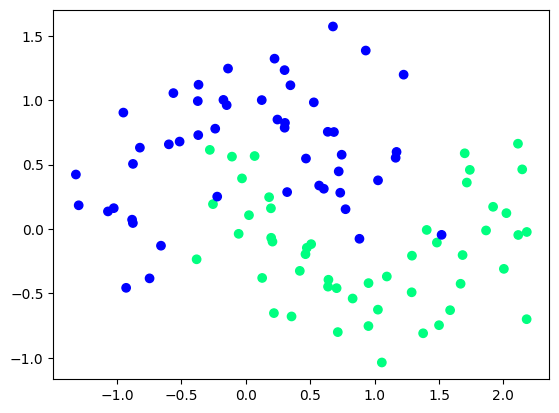

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0],x[:,1],c=y,cmap='winter')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x,y)

LogisticRegression()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       99 non-null     float64
 1   Y       99 non-null     float64
 2   Class   99 non-null     float64
dtypes: float64(3)
memory usage: 2.4 KB


<Axes: >

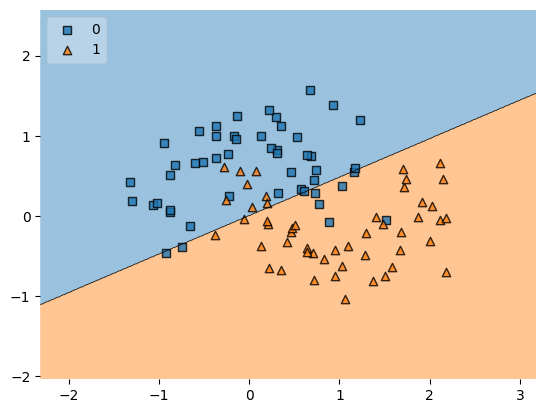

In [13]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x, y.values.astype(int), clf, legend=2)


In [15]:
import numpy as np

from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(clf,x,y,scoring='accuracy',cv=10))

0.8300000000000001

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
x_trf = poly.fit_transform(x)

In [18]:
clf1 = LogisticRegression()
np.mean(cross_val_score(clf1,x_trf,y,scoring='accuracy',cv=10))

0.9099999999999999

In [33]:

def plot_decision_boundary(X,y,degree=1):
    
    poly = PolynomialFeatures(degree=degree)
    X_trf = poly.fit_transform(X)
    
    clf = LogisticRegression()
    clf.fit(X_trf,y)
    
    accuracy = np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10))
    
    a=np.arange(start=X[:,0].min()-1, stop=X[:,0].max()+1, step=0.01)
    b=np.arange(start=X[:,1].min()-1, stop=X[:,1].max()+1, step=0.01)


    XX,YY=np.meshgrid(a,b)
    
    input_array=np.array([XX.ravel(),YY.ravel()]).T #ravel 1 d array convert .t mane transpose hoy

    labels=clf.predict(poly.transform(input_array))
    
    plt.contourf(XX,YY,labels.reshape(XX.shape),alpha=0.5)
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.title('Degree = {}, accuracy is {}'.format(degree,np.round(accuracy,4)))

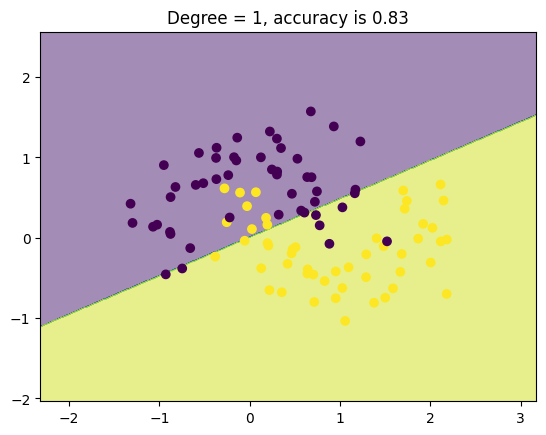

In [32]:
  plot_decision_boundary(x,y)

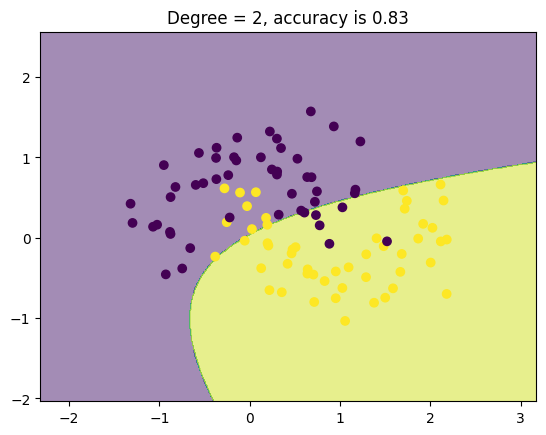

In [35]:
  plot_decision_boundary(x,y,degree=2)

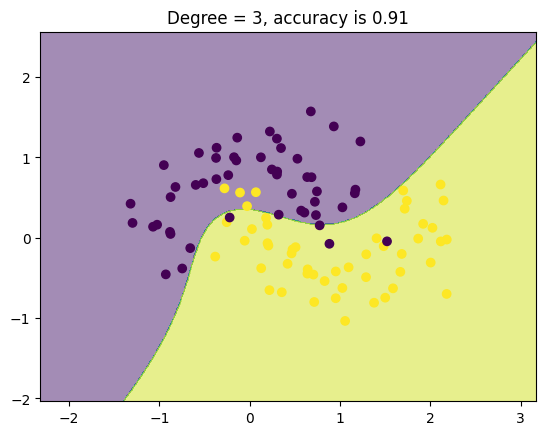

In [36]:
  plot_decision_boundary(x,y,degree=3)

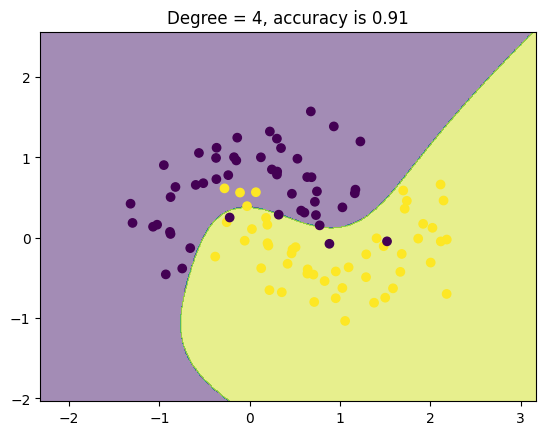

In [37]:
  plot_decision_boundary(x,y,degree=4)

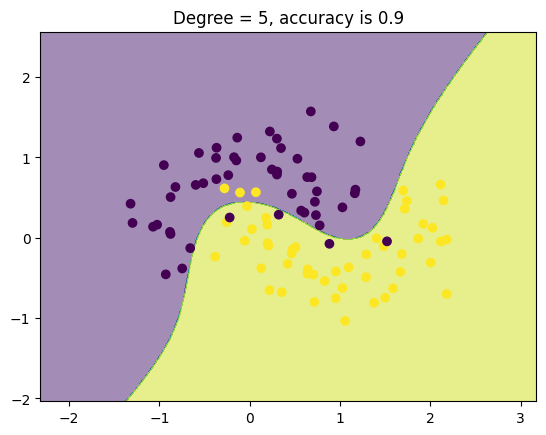

In [38]:
  plot_decision_boundary(x,y,degree=5)

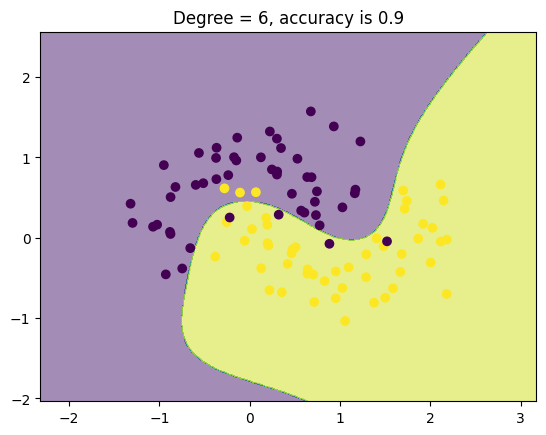

In [40]:
  plot_decision_boundary(x,y,degree=6)

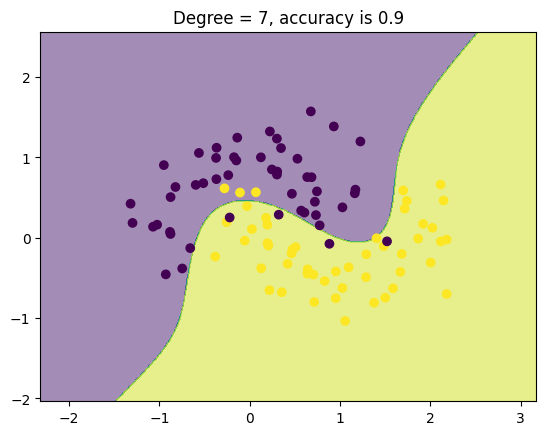

In [41]:
  plot_decision_boundary(x,y,degree=7)

/home/catpc/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/catpc/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

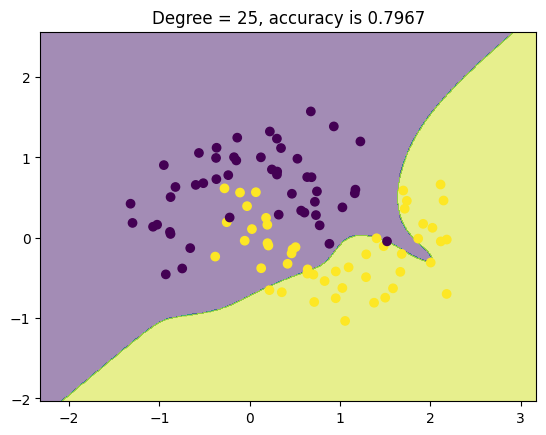

In [43]:
  plot_decision_boundary(x,y,degree=25)